In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
d1 = files.upload()
patients = pd.read_csv('PATIENTS.csv')

Saving PATIENTS.csv to PATIENTS (1).csv


In [ ]:
d2 = files.upload()
admissions = pd.read_csv('ADMISSIONS.csv')

Saving ADMISSIONS.csv to ADMISSIONS (1).csv


In [ ]:
d3 = files.upload()
callout = pd.read_csv('CALLOUT.csv')

Saving CALLOUT.csv to CALLOUT (1).csv


In [ ]:
d4 = files.upload()
drugCodes = pd.read_csv('DRGCODES.csv')

Saving DRGCODES.csv to DRGCODES (1).csv


In [ ]:
d5 = files.upload()
services = pd.read_csv('SERVICES.csv')

Saving SERVICES.csv to SERVICES (1).csv


# Patients Table



In [ ]:
df = patients
print(df['GENDER'].value_counts())

GENDER
M    26121
F    20399
Name: count, dtype: int64


In [ ]:
from datetime import datetime

# Calculate age function
def calculate_age(dob, dod):
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age

# Apply calculate_age function to create "age" column
dead_df = df[df['EXPIRE_FLAG'] == 1 ]
df["AGE"] = dead_df.apply(lambda row: calculate_age(row["DOB"], row["DOD"]), axis=1)

# Filter out rows with age greater than or equal to 120
filtered_df = df[df["AGE"] < 120]

# Display the updated DataFrame
print(filtered_df.head())

    ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
1      235         250      F  2164-12-27 00:00:00  2188-11-22 00:00:00   
7      241         257      F  2031-04-03 00:00:00  2121-07-08 00:00:00   
10     244         261      M  2025-08-04 00:00:00  2102-06-29 00:00:00   
12     246         263      M  2104-06-18 00:00:00  2168-06-13 00:00:00   
17     251         268      F  2132-02-21 00:00:00  2198-02-18 00:00:00   

               DOD_HOSP              DOD_SSN  EXPIRE_FLAG  AGE  
1   2188-11-22 00:00:00                  NaN            1   23  
7   2121-07-08 00:00:00  2121-07-08 00:00:00            1   90  
10  2102-06-29 00:00:00  2102-06-29 00:00:00            1   76  
12  2168-06-13 00:00:00                  NaN            1   64  
17  2198-02-18 00:00:00                  NaN            1   66  


<ipython-input-24-c957b4b3d54c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AGE"] = dead_df.apply(lambda row: calculate_age(row["DOB"], row["DOD"]), axis=1)


<ipython-input-19-90b6bc536593>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alive_counts.index, y=alive_counts.values, palette="viridis")


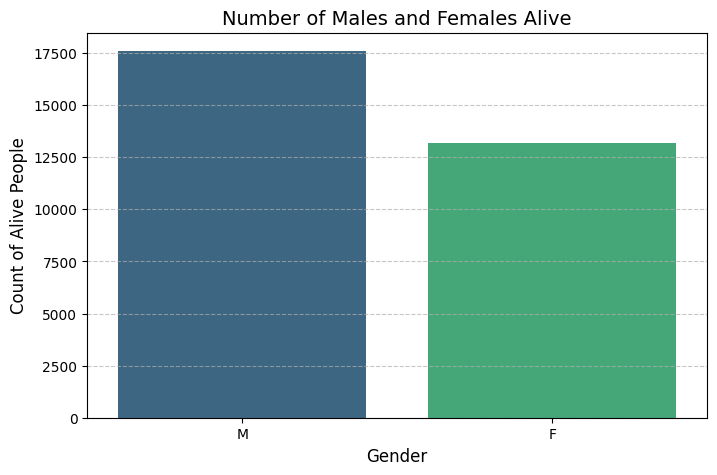

In [ ]:
#Creating a visualization for how many males and females are alive

#Filtering only alive people
alive_df = df[df['EXPIRE_FLAG'] == 0 ]

#Counting number of alive males and females
alive_counts = alive_df['GENDER'].value_counts()


plt.figure(figsize=(8, 5))
sns.barplot(x=alive_counts.index, y=alive_counts.values, palette="viridis")

plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count of Alive People", fontsize=12)
plt.title("Number of Males and Females Alive", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Patients and Admission table


In [ ]:
from datetime import datetime
df = patients
# Calculate age function
def calculate_age(dob, dod):
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age

# Apply calculate_age function to create "age" column
alive_df = df[df['EXPIRE_FLAG'] == 1 ]
df["age"] = alive_df.apply(lambda row: calculate_age(row["DOB"], row["DOD"]), axis=1)

# Filter out rows with age greater than or equal to 120
filtered_df = df[df["age"] < 120]

# Display the updated DataFrame
print(filtered_df.head())

    ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
1      235         250      F  2164-12-27 00:00:00  2188-11-22 00:00:00   
7      241         257      F  2031-04-03 00:00:00  2121-07-08 00:00:00   
10     244         261      M  2025-08-04 00:00:00  2102-06-29 00:00:00   
12     246         263      M  2104-06-18 00:00:00  2168-06-13 00:00:00   
17     251         268      F  2132-02-21 00:00:00  2198-02-18 00:00:00   

               DOD_HOSP              DOD_SSN  EXPIRE_FLAG   age  
1   2188-11-22 00:00:00                  NaN            1  23.0  
7   2121-07-08 00:00:00  2121-07-08 00:00:00            1  90.0  
10  2102-06-29 00:00:00  2102-06-29 00:00:00            1  76.0  
12  2168-06-13 00:00:00                  NaN            1  64.0  
17  2198-02-18 00:00:00                  NaN            1  66.0  


In [ ]:
# Merge admissions and patients data on subject_id
merged_data = pd.merge(admissions, filtered_df, on="SUBJECT_ID")
merged_data.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,age
0,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,0,1,23,M,2054-05-04 00:00:00,2128-02-25 00:00:00,NaN,2128-02-25 00:00:00,1,73.0
1,30,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,1,1,27,M,2036-05-17 00:00:00,2108-08-30 00:00:00,2108-08-30 00:00:00,2108-08-30 00:00:00,1,72.0
2,39,37,188670,2183-08-21 16:48:00,2183-08-26 18:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,...,0,1,33,M,2114-09-17 00:00:00,2185-01-06 00:00:00,2185-01-06 00:00:00,2185-01-06 00:00:00,1,70.0
3,42,41,101757,2132-12-31 10:30:00,2133-01-27 15:45:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,DISC-TRAN TO FEDERAL HC,Private,...,0,1,36,M,2076-05-13 00:00:00,2133-09-30 00:00:00,NaN,2133-09-30 00:00:00,1,57.0
4,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,0,1,336,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66.0


In [44]:
merged_data['GENDER'].value_counts()

,count
GENDER,
M,11591
F,9007


In [51]:
merged_data['ADMISSION_LOCATION'].value_counts()

,count
ADMISSION_LOCATION,
EMERGENCY ROOM ADMIT,10694
TRANSFER FROM HOSP/EXTRAM,3720
CLINIC REFERRAL/PREMATURE,3081
PHYS REFERRAL/NORMAL DELI,2885
TRANSFER FROM SKILLED NUR,166
TRANSFER FROM OTHER HEALT,43
** INFO NOT AVAILABLE **,5
HMO REFERRAL/SICK,4


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'TRANSFER FROM HOSP/EXTRAM'),
  Text(1, 0, 'EMERGENCY ROOM ADMIT'),
  Text(2, 0, 'PHYS REFERRAL/NORMAL DELI'),
  Text(3, 0, 'CLINIC REFERRAL/PREMATURE'),
  Text(4, 0, 'TRANSFER FROM SKILLED NUR'),
  Text(5, 0, 'TRANSFER FROM OTHER HEALT'),
  Text(6, 0, 'HMO REFERRAL/SICK'),
  Text(7, 0, '** INFO NOT AVAILABLE **')])

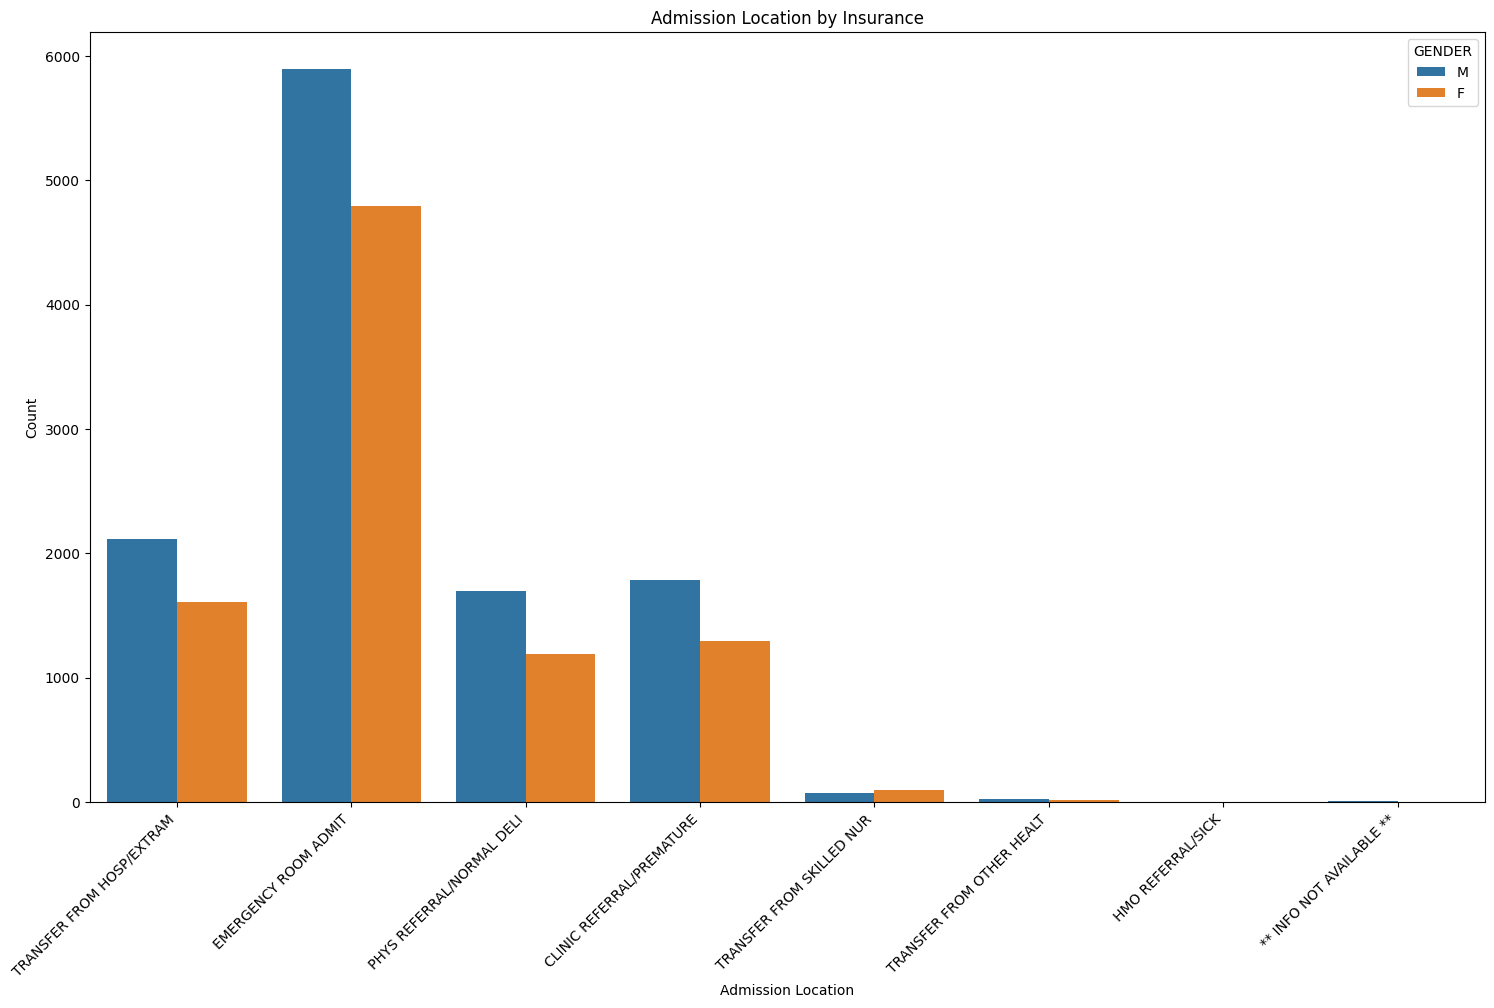

In [50]:
# Create a complex visualization
plt.figure(figsize=(18, 10))

sns.countplot(data=merged_data, x='ADMISSION_LOCATION', hue='GENDER')
plt.title("Admission Location by Gender")
plt.xlabel("Admission Location")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')


11591
9007


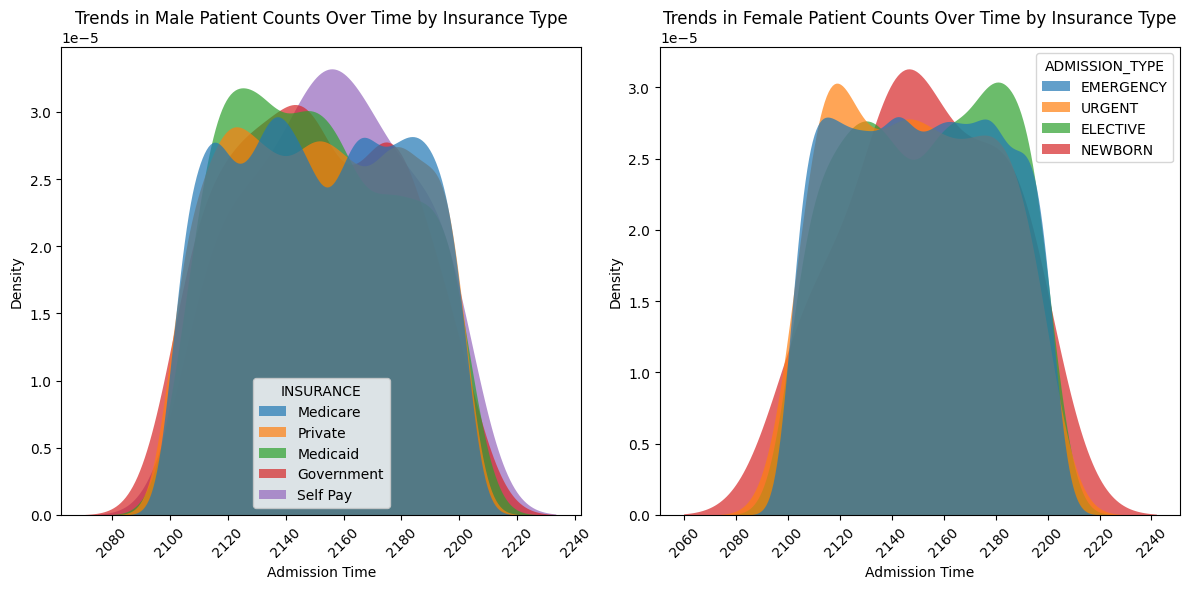

In [68]:
merged_data['ADMITTIME'] = pd.to_datetime(merged_data['ADMITTIME'])  # Convert to datetime



male_data = merged_data[merged_data['GENDER'] == 'M']
print(male_data['GENDER'].count())

female_data = merged_data[merged_data['GENDER'] == 'F']
print(female_data['GENDER'].count())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=male_data, x='ADMITTIME', hue='INSURANCE', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='Male')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('Trends in Male Patient Counts Over Time by Insurance Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.kdeplot(data=female_data, x='ADMITTIME', hue='ADMISSION_TYPE', fill=True, common_norm=False, palette='tab10', alpha=0.7, linewidth=0, label='Female')
plt.xlabel('Admission Time')
plt.ylabel('Density')
plt.title('Trends in Female Patient Counts Over Time by Insurance Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Patients and Drug codes

In [85]:
drug_dict = drugCodes.set_index('DRG_CODE')['DESCRIPTION'].to_dict()

# Print the dictionary
print(drug_dict)

{28: 'SPINAL PROCEDURES W MCC', 110: 'MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICATIONS, COMORBIDITIES', 390: 'G.I. OBSTRUCTION W/O CC/MCC', 14: 'ALLOGENEIC BONE MARROW TRANSPLANT', 385: 'INFLAMMATORY BOWEL DISEASE W MCC', 105: 'CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PROC WITHOUT CARDIAC CATHETER', 101: 'SEIZURES W/O MCC', 107: 'CORONARY BYPASS WITH CARDIAC CATHETER', 487: 'OTHER MULTIPLE SIGNIFICANT TRAUMA', 78: 'HYPERTENSIVE ENCEPHALOPATHY W CC', 483: 'Peripheral, Cranial & Autonomic Nerve Disorders', 202: 'BRONCHITIS & ASTHMA W CC/MCC', 514: 'Viral Meningitis', 416: 'CHOLECYSTECTOMY EXCEPT BY LAPAROSCOPE W/O C.D.E. W/O CC/MCC', 109: 'CORONARY BYPASS WITHOUT CARDIAC CATHETER', 475: 'AMPUTATION FOR MUSCULOSKELETAL SYS & CONN TISSUE DIS W CC', 174: 'GASTROINTESTINAL HEMORRHAGE WITH COMPLICATIONS, COMORBIDITIES', 89: 'CONCUSSION W CC', 1: 'HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC', 468: 'EXTENSIVE OPERATING ROOM PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS', 131: 'CRA

In [109]:
#merging patient table with drug code
merged_data_drug_codes = pd.merge(patients, drugCodes, on='SUBJECT_ID', how='inner')
top_drug_codes_male = merged_data_drug_codes[merged_data_drug_codes['GENDER'] == 'M']['DRG_CODE'].value_counts().head(10)
top_drug_codes_female = merged_data_drug_codes[merged_data_drug_codes['GENDER'] == 'F']['DRG_CODE'].value_counts().head(10)

<ipython-input-112-9ee388aba472>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drug_codes_male.values, y=top_drug_codes_male.index, palette='viridis', orient= 'h')
<ipython-input-112-9ee388aba472>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drug_codes_female.values, y=top_drug_codes_female.index, palette='viridis', orient= 'h')


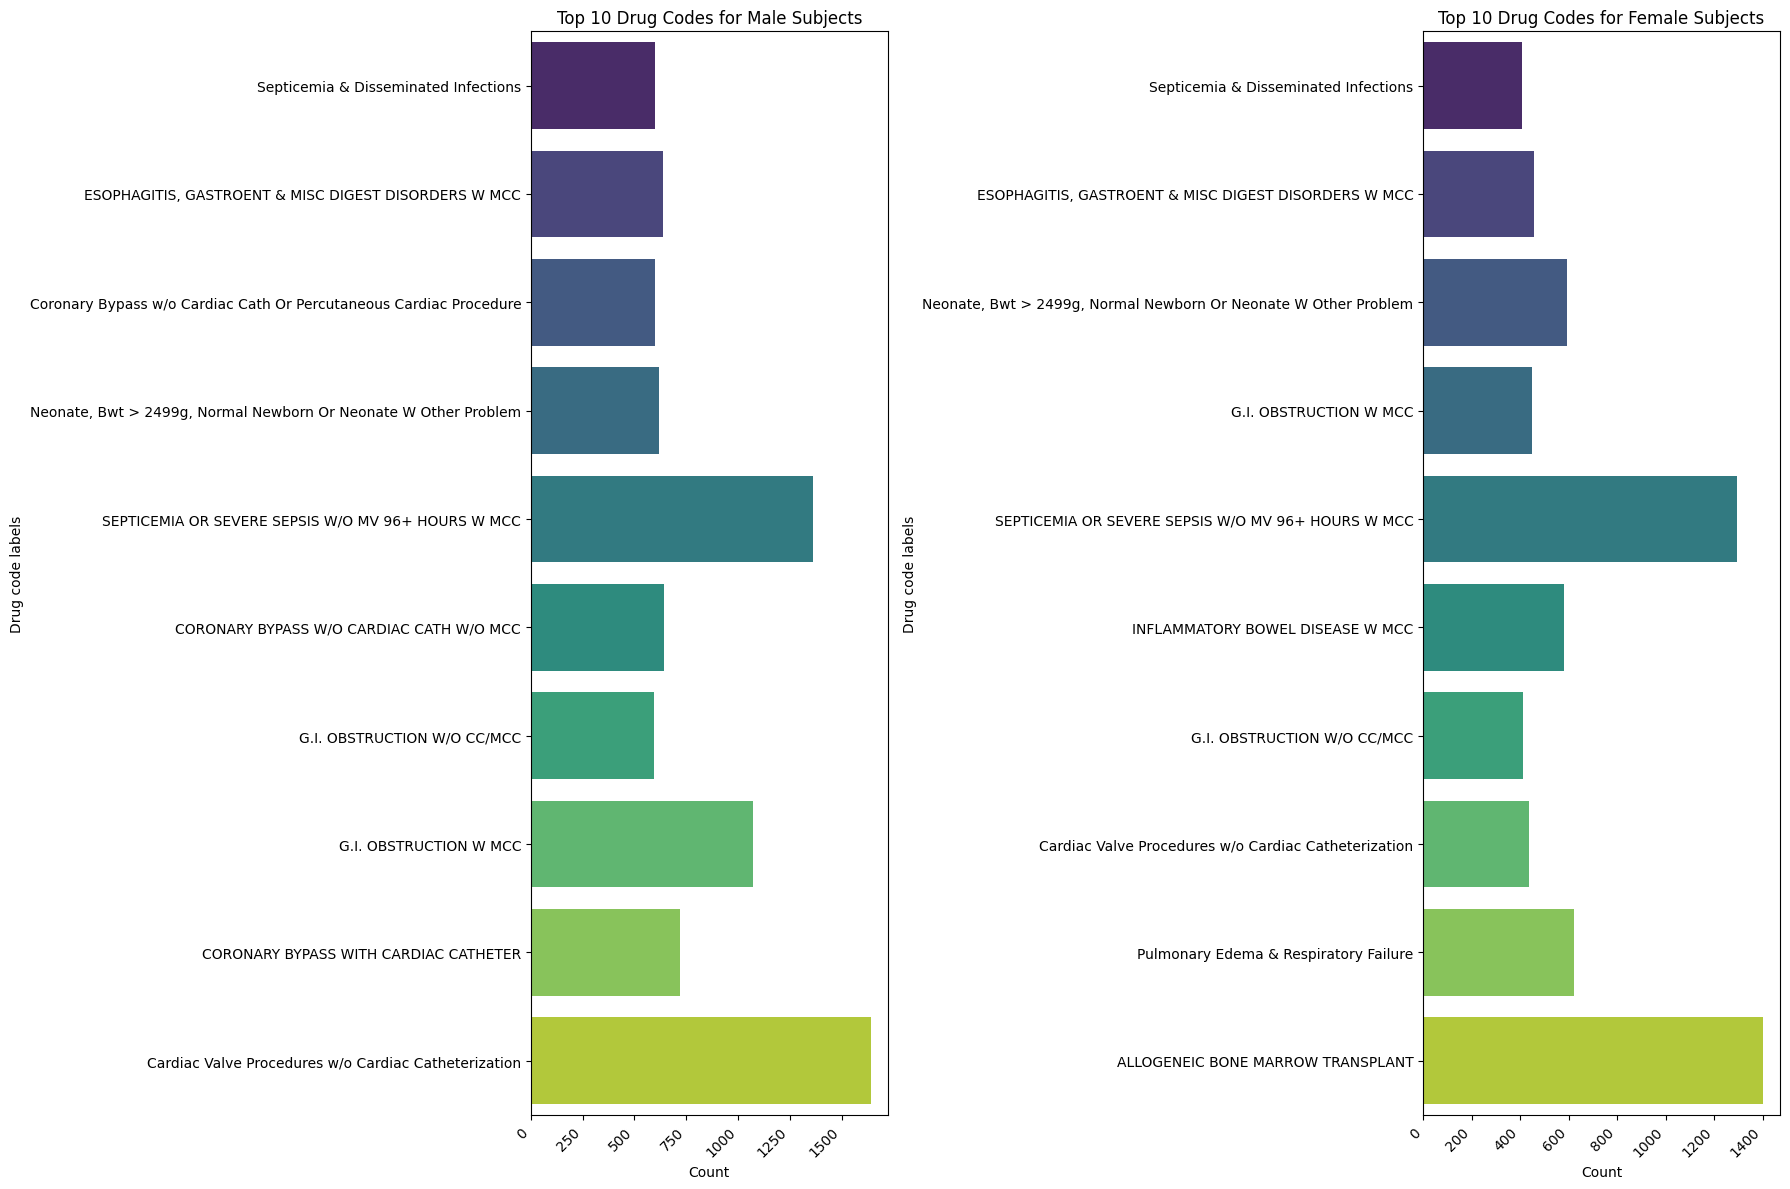

In [112]:
plt.figure(figsize=(18, 12))

plt.subplot(1, 2, 1)
sns.barplot(x=top_drug_codes_male.values, y=top_drug_codes_male.index, palette='viridis', orient= 'h')
plt.title("Top 10 Drug Codes for Male Subjects")
plt.xlabel("Count")
plt.ylabel("Drug code labels")
plt.xticks(rotation=45, ha='right')

# Label the x-axis ticks with short titles
male_drug_titles = [drug_dict[code] for code in top_drug_codes_male.index]
plt.yticks(range(10), male_drug_titles)

# Subplot for Female Subjects
plt.subplot(1, 2, 2)
sns.barplot(x=top_drug_codes_female.values, y=top_drug_codes_female.index, palette='viridis', orient= 'h')
plt.title("Top 10 Drug Codes for Female Subjects")
plt.xlabel("Count")
plt.ylabel("Drug code labels")
plt.xticks(rotation=45, ha='right')

# # Label the x-axis ticks with short titles
female_drug_titles = [drug_dict[code] for code in top_drug_codes_female.index]
plt.yticks(range(10), female_drug_titles)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [131]:
import pandas as pd
import plotly.graph_objects as go

# Create a DataFrame for male and female diagnosis codes
male_df = pd.DataFrame({'drug_code': top_drug_codes_male.index, 'count': top_drug_codes_male.values})
female_df = pd.DataFrame({'drug_code': top_drug_codes_female.index, 'count': top_drug_codes_female.values})

# Map ICD-9 codes to short titles
male_df['labels'] = male_df['drug_code'].map(drug_dict)
female_df['labels'] = female_df['drug_code'].map(drug_dict)
print(male_df.value_counts())

# Create a new column 'hover_text' that combines 'drug_code', 'labels', and 'count'
male_df['hover_text'] = male_df['drug_code'].astype(str) + '<br>Drug decription: ' + male_df['labels'] + '<br>Drug Code: ' + male_df['drug_code'].astype(str) + '<br>Count: ' + male_df['count'].astype(str).str.strip()
female_df['hover_text'] = female_df['drug_code'].astype(str) + '<br>Drug decription: ' + female_df['labels'] + '<br>Drug Code: ' + female_df['drug_code'].astype(str) + '<br>Count: ' + female_df['count'].astype(str)

# Create treemaps using Plotly Graph Objects with custom hover data and template
fig_male = go.Figure(go.Treemap(
    labels=male_df['labels'],
    parents=[''] * len(male_df),  # Set parent to empty string to remove parent levels
    values=male_df['count'],
    customdata=male_df[['drug_code', 'hover_text']],
    hovertemplate='<b>%{customdata[0]}</b><br>%{customdata[1]}',
))
fig_male.update_layout(title='Top 10 Drug Codes for Male Subjects')

fig_female = go.Figure(go.Treemap(
    labels=female_df['labels'],
    parents=[''] * len(female_df),  # Set parent to empty string to remove parent levels
    values=female_df['count'],
    customdata=female_df[['drug_code', 'hover_text']],
    hovertemplate='<b>%{customdata[0]}</b><br>%{customdata[1]}',
))
fig_female.update_layout(title='Top 10 Drug Codes for Female Subjects')

# Show the treemaps
fig_male.show()
fig_female.show()

drug_code  count  labels                                                            
107        597    CORONARY BYPASS WITH CARDIAC CATHETER                                 1
236        639    CORONARY BYPASS W/O CARDIAC CATH W/O MCC                              1
388        601    G.I. OBSTRUCTION W MCC                                                1
390        617    G.I. OBSTRUCTION W/O CC/MCC                                           1
391        1360   ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W MCC                  1
871        645    SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                    1
1633       596    Cardiac Valve Procedures w/o Cardiac Catheterization                  1
1662       1071   Coronary Bypass w/o Cardiac Cath Or Percutaneous Cardiac Procedure    1
6402       721    Neonate, Bwt > 2499g, Normal Newborn Or Neonate W Other Problem       1
7204       1641   Septicemia & Disseminated Infections                                  1
Name: count, dt